# Introducció a la pràctica 1: primers passos

## Objectius

Els objectius d'aquesta pràctica són:

* Aplicar models de regressió, ficant l'èmfasi en: 
    1. Analitzar els atributs per seleccionar els més representatius i normalitzar-los.
    2. Avaluar correctament l'error del model 
    3. Visualitzar les dades i el model resultant
    4. Saber aplicar el procès de descens del gradient

* Ésser capaç d'aplicar tècniques de regressió en casos reals

* Validar els resultats en dades reals

* Fomentar la capacitat per presentar resultats tècnics d'aprenentatge computacional de forma adequada davant altres persones


### Jupyter Notebook

Aquest ``jupyter notebook`` està compost de blocs de text i codi, recordeu que hi ha blocs de codi que depenen de que blocs anteriors hagin estat executats. 

El codi d'aquest notebook és modificable i us recomanem que feu canvis i en comproveu els resultats.

**Per a executar el notebook: cal que instal.leu [jupyter notebook](http://jupyter.readthedocs.io/en/latest/install.html).**


### Guia d'instal.lació de les llibreries


És molt recomanable que utilitzeu Linux, ja que agilitza la instal.lació de les llibreries. També es recomana utilitzar **Anaconda**, una distribucó de python multiplataforma que permet instal.lar llibreries fàcilment i l'IDE d'spyder o PyCharm.

Donat que teniu conda o pypi (pip) (aquest segon es pot instal.lar amb ``apt-get``), heu d'instal.lar els següents paquets (exemple en pypi):

```
sudo pip install numpy
sudo pip install scikit-learn
sudo pip install matplotlib
sudo pip install scipy
```

En el cas d'Anaconda, substituir ``sudo pip`` per ``conda``.

En el cas del matplotlib, si us dona errors en Ubuntu Linux (`FileNotFoundError: [Errno 2] No such file or directory: 'latex': 'latex'`), cal instal·lar el paquet `texlive-full` (`sudo apt install texlive-full`) que ocupa 3-4GB. Si només ho voleu per aquesta pràctica, podeu provar amb el `textlive-base` (uns 100MB)


## Avaluació i entregues de la pràctica 1

En la pràctica 1, es presenten diversos problemes per comprendre els mètodes de regressió numèrica. 

Les entregues s'organitzen en tres nivells d'assoliment dels objectius, incrementals: apartat **C (sobre 5 punts)**, assoliment baix, apartat **B, (sobre 3 punts)**, assoliment mig i apartat **A, (sobre 2 punts)**, assoliment alt. La suma dels 3 apartats serà la nota final de la pràctica 1.

Per aprovar la pràctica és requisit necessari completar satisfactòriament els problemes d'assoliment baix (C), demostrant així una comprensió mínima de la matèria. Per tant, la superació de la pràctica 1 estarà condicionada a la presentació de la documentació sobre l'apartat (C), i serà opcional realitzar els apartats (B i A).

Resumint, la pràctica 1 conté 3 apartats:

* apartat C. serà obligatori per aprovar la pràctica 1 (amb un 5.0)
* apartat B. serà opcional i val fins a 3 punts (cal haver fet el apartat C).
* apartat A. serà opcional i val fins a 2 punts (cal haver fet el apartat C i B).


### Sessió de treball i sessió d'avaluació

La sessió de treball del 29 de setembre, està orientada a que els alumnes que vingueu pugueu preguntar i resoldre dubtes sobre les bases de dades que us han estat assignades, preguntar sobre l'objectiu de cada apartat dels enunciats que no us hagi quedat clar, i preguntar sobre els resultats que esteu obtenint a l'hora d'analitzar les dades.

En definitiva, l'objectiu de la sessió de treball és que al sortir tingueu clar com són les vostres dades, què cal entregar i com implementar cada apartat C, B i A. 

En la següent sessió d'avaluació del 13 d'octubre, la màxima puntuació per la **pràctica 1 de regressió** s'aconsegueix resolent els problemes dels apartats (B i A), d'entrega opcional. Caldrà pujar al Caronte abans de les 23:59h del dimecres 12 d'octubre un ZIP amb el codi, la documentació i el ppt (10 minuts).

* Entrega ZIP 
   1. Memòria explicant els resultats trobats en la base de dades que heu treballat, detallant el passos seguits (60% de la nota). 
   2. Codi python desenvolupat (30% de la nota)
   3. Presentació amb els resultats 10 min màxim (10% de la nota)




## Material de la pràctica 1


### Bases de Dades

| 8  | https://www.kaggle.com/vikrishnan/boston-house-prices                    | GPA203-0930 |


# Apartat (C): Analitzant Dades

L'objectiu d'aquest primer apartat serà conèixer la base de dades que es té entre mans. S'han d'analitzar els diferents atributs que la composen, entendre'ls i, si no està estipulat, **caldrà fixar quin es l'atribut objectiu a predir de tots els que hi ha a la base de dades**, justificant el per què de la decisió (és útil i representatiu pel problema, per exemple, donat un conjunt de dades sobre persones: edat, gènere, pes, alçada, risc de patir càncer, aquesta última pot ser justificada com la de més interés). També podeu mirar que l'atribut objectiu tingui valors que canvien. Per exemple, no té sentit predir un atribut on el 99% dels valors són 0, i hi ha algun 1.

Ara podeu veure un exemple amb una base de dades **dummy** que creem nosaltres mateixos:

In [21]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
import warnings
from sklearn.model_selection import cross_val_score, train_test_split
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
colnam = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, skiprows = 1, names=colnam, delimiter='\s+')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('housing.csv')
data = dataset.values

x = data[:, :2]
y = data[:, 0]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (504, 14)
Dimensionalitat de les entrades X (504, 2)
Dimensionalitat de l'atribut Y (504,)


In [70]:
def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

def mse(v1, v2):
    return ((v1 - v2)**2).mean()

In [2]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
1,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
2,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200
3,0.030,0.000,2.180,0,0.458,6.430,58.700,6.062,3,222.000,18.700,394.120,5.210,28.700
4,0.088,12.500,7.870,0,0.524,6.012,66.600,5.561,5,311.000,15.200,395.600,12.430,22.900


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     504 non-null    float64
 1   ZN       504 non-null    float64
 2   INDUS    504 non-null    float64
 3   CHAS     504 non-null    int64  
 4   NOX      504 non-null    float64
 5   RM       504 non-null    float64
 6   AGE      504 non-null    float64
 7   DIS      504 non-null    float64
 8   RAD      504 non-null    int64  
 9   TAX      504 non-null    float64
 10  PTRATIO  504 non-null    float64
 11  B        504 non-null    float64
 12  LSTAT    504 non-null    float64
 13  MEDV     504 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.2 KB


In [4]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [5]:
print("Per veure estadístiques dels atributs numèrics de la BBDD:")
dataset.describe()


Per veure estadístiques dels atributs numèrics de la BBDD:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,504.000,504.000,504.000,504.000,504.000,504.000,504.000,504.000,504.000,504.000,504.000,504.000,504.000,504.000
mean,3.628,11.373,11.162,0.069,0.555,6.284,68.561,3.792,9.581,408.790,18.463,356.514,12.675,22.532
std,8.616,23.361,6.860,0.254,0.116,0.704,28.201,2.109,8.710,168.634,2.164,91.441,7.145,9.215
min,0.009,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.885,44.850,2.097,4.000,279.000,17.400,375.300,6.990,16.950
50%,0.260,0.000,9.690,0.000,0.538,6.205,77.500,3.191,5.000,330.000,19.100,391.385,11.395,21.200
75%,3.682,12.500,18.100,0.000,0.624,6.626,94.100,5.213,24.000,666.000,20.200,396.210,16.992,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


## Mirar valores atípicos y estadísticas

<IPython.core.display.Javascript object>


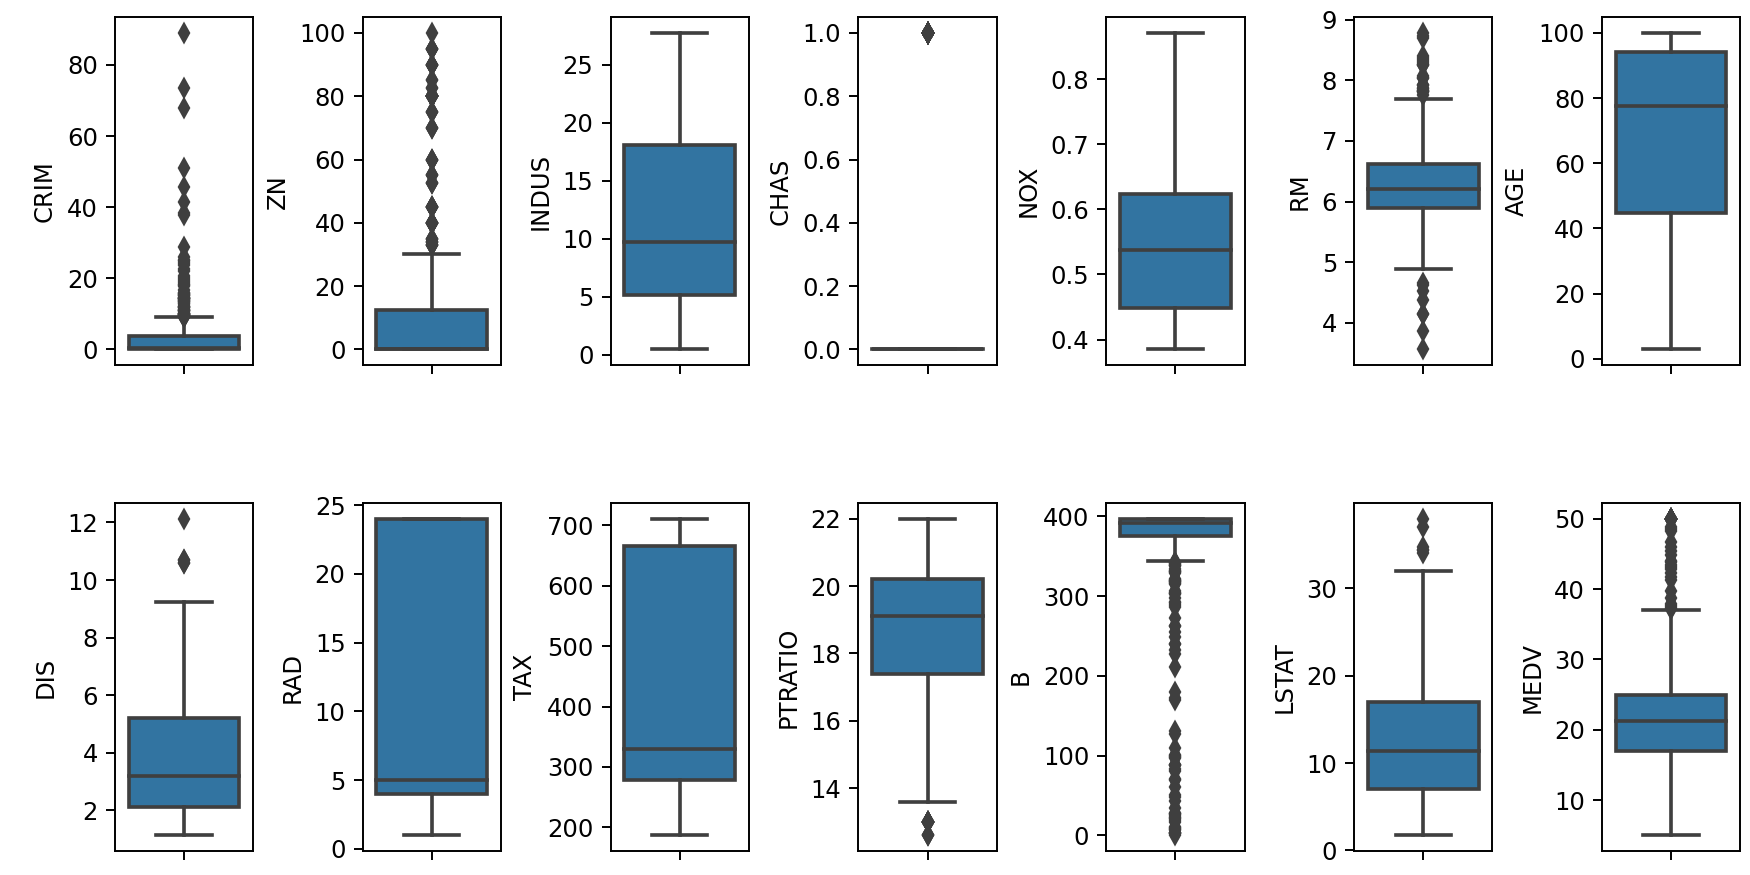

In [6]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=k, data=dataset, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<IPython.core.display.Javascript object>


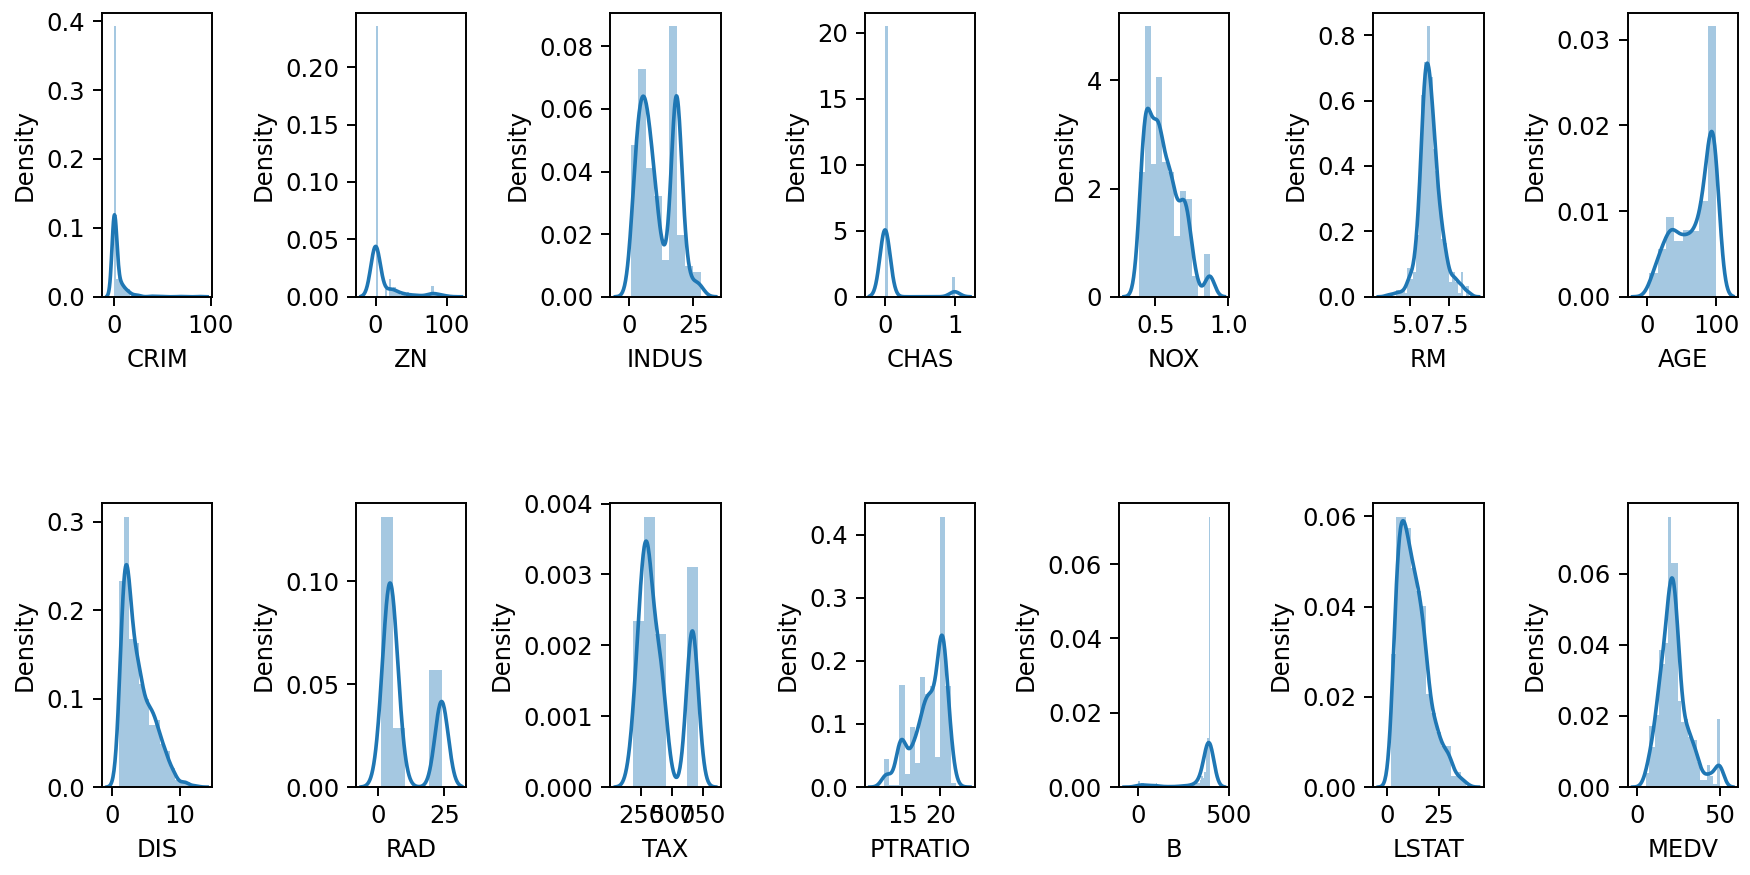

In [7]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(10, 5))
index = 0
ax = ax.flatten()

for col, value in dataset.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [8]:
#vamos a ver el % de valores atípicos en cada columna
for k, v in dataset.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(dataset)[0]
    print("Columna %s -> porcentaje de valores atípicos = %.2f%%" % (k, perc))

Columna CRIM -> porcentaje de valores atípicos = 13.10%
Columna ZN -> porcentaje de valores atípicos = 13.49%
Columna INDUS -> porcentaje de valores atípicos = 0.00%
Columna CHAS -> porcentaje de valores atípicos = 100.00%
Columna NOX -> porcentaje de valores atípicos = 0.00%
Columna RM -> porcentaje de valores atípicos = 5.95%
Columna AGE -> porcentaje de valores atípicos = 0.00%
Columna DIS -> porcentaje de valores atípicos = 0.99%
Columna RAD -> porcentaje de valores atípicos = 0.00%
Columna TAX -> porcentaje de valores atípicos = 0.00%
Columna PTRATIO -> porcentaje de valores atípicos = 2.98%
Columna B -> porcentaje de valores atípicos = 15.08%
Columna LSTAT -> porcentaje de valores atípicos = 1.19%
Columna MEDV -> porcentaje de valores atípicos = 7.34%


In [9]:
from scipy.stats import normaltest

for idx, dist in enumerate([dataset['CRIM'], dataset['ZN'], dataset['INDUS'], dataset['CHAS'], dataset['NOX'], dataset['RM'],
                           dataset['AGE'], dataset['DIS'], dataset['RAD'], dataset['TAX'], dataset['PTRATIO'], dataset['B'], 
                           dataset['LSTAT'], dataset['MEDV']]):

    stat, p = normaltest(dist)
    alpha = .05

    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(f' {idx} The null hypothesis can be rejected')
    else:
        print(f' {idx} The null hypothesis cannot be rejected (comes from a normal dist)')

 0 The null hypothesis can be rejected
 1 The null hypothesis can be rejected
 2 The null hypothesis can be rejected
 3 The null hypothesis can be rejected
 4 The null hypothesis can be rejected
 5 The null hypothesis can be rejected
 6 The null hypothesis can be rejected
 7 The null hypothesis can be rejected
 8 The null hypothesis can be rejected
 9 The null hypothesis can be rejected
 10 The null hypothesis can be rejected
 11 The null hypothesis can be rejected
 12 The null hypothesis can be rejected
 13 The null hypothesis can be rejected


reemplazamos en % de valores atípicos por el valor de la mediana

In [10]:
median = dataset.median()
print(median)

#print(np.shape(dataset))


#vamos a ver el % de valores atípicos en cada columna


CRIM        0.260
ZN          0.000
INDUS       9.690
CHAS        0.000
NOX         0.538
RM          6.205
AGE        77.500
DIS         3.191
RAD         5.000
TAX       330.000
PTRATIO    19.100
B         391.385
LSTAT      11.395
MEDV       21.200
dtype: float64


Ahora vamos a volver a ver las estadísticas 

També podem estudiar la correlació entre els diferents atributs per tal de saber si estan correlacionats entre ells.

<IPython.core.display.Javascript object>


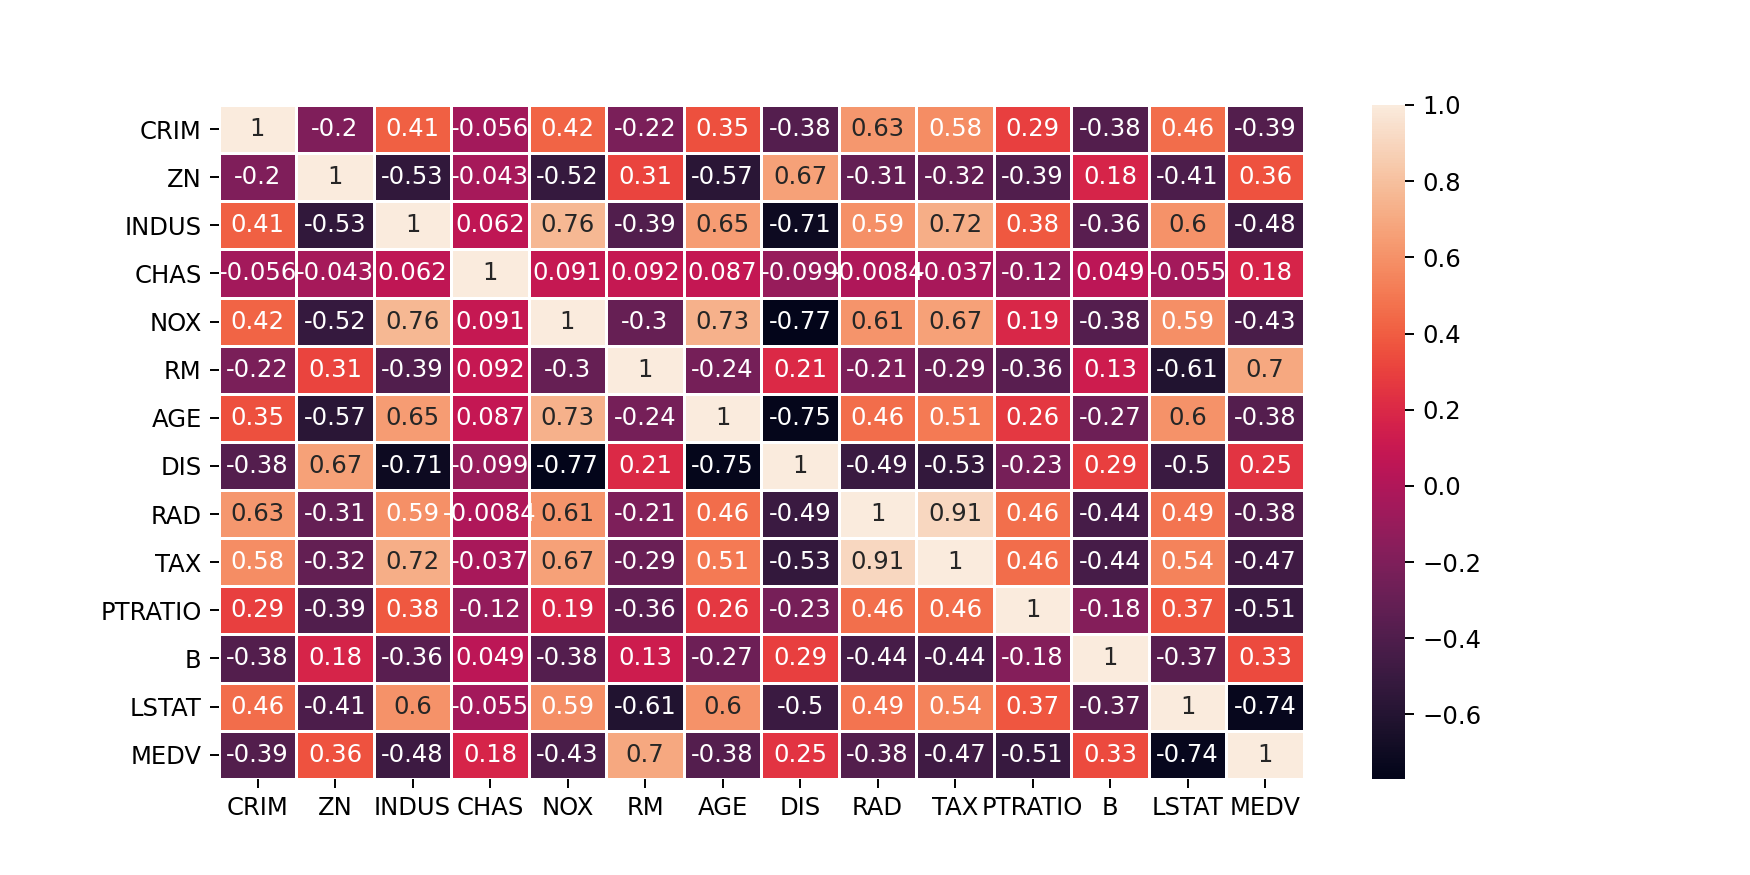

In [11]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

#sklearn polinomialfit

També podem utilitzar la funció pairplot per tal de veure els atributs que estan relacionats entre si.

Així doncs ara podreu respondre a les següents preguntes:

1. Quin és el tipus de cada atribut? 
2. Quins atributs tenen una distribució Guassiana?
3. Quin és l'atribut objectiu? Per què?

# Apartat (B): Primeres regressions

Per a aquest primer apartat es calcularà l'error quadràtic mitjà només del regressor per a cada un dels atributs de la base de dades, determinant aquell atribut pel qual l'error quadràtic mitjà (entre el valor predit i el real, per a cada mostra) és més baix. 

A continuació se us dona una funció auxiliar per a calcular l'error quadràtic mitjà:

## Separación train-test

In [130]:
idx = dataset.sample(frac=0.7).index

train = dataset[dataset.index.isin(idx)]
test = dataset[~dataset.index.isin(idx)]


train_x = train[['CRIM', 'ZN','INDUS','CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
train_y = train['MEDV']

test_x = test[['CRIM', 'ZN','INDUS','CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
test_y = test['MEDV']

print(dataset.columns)
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
Train: (353, 14)
Test: (151, 14)


## Regresión datos no estandarizados

<IPython.core.display.Javascript object>


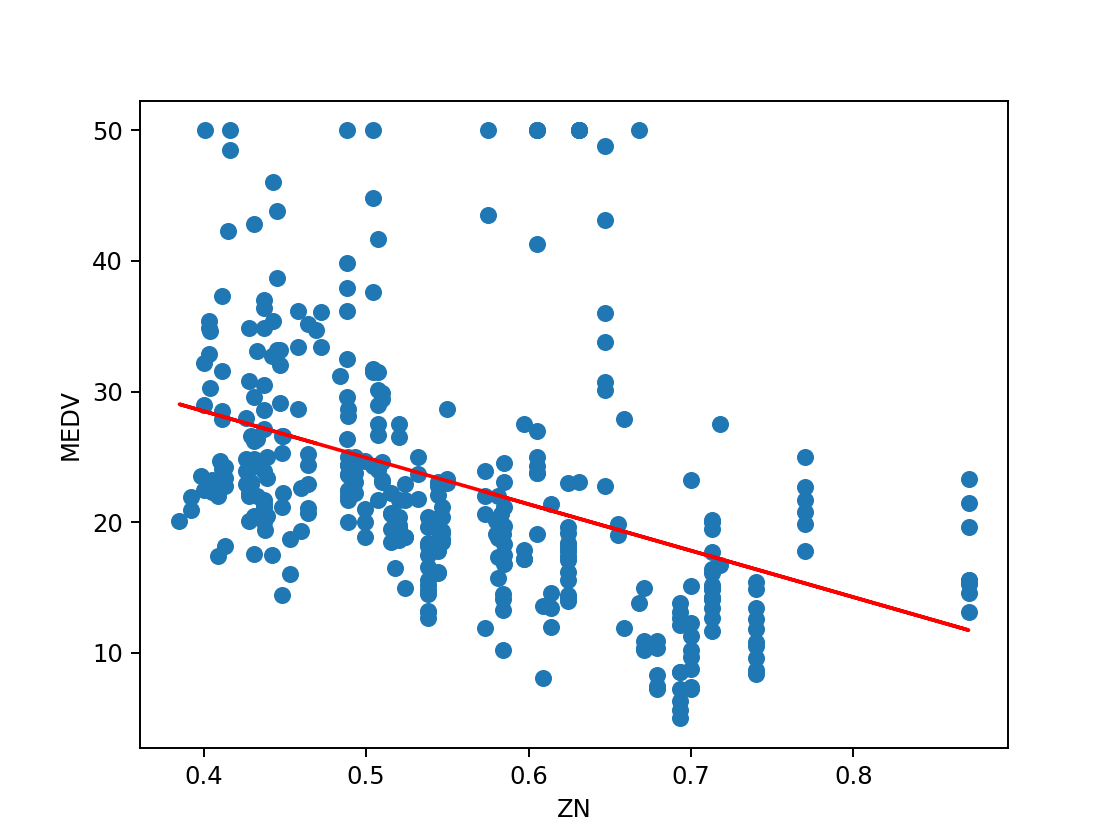

Text(0, 0.5, 'MEDV')

In [114]:
from sklearn.metrics import r2_score

# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
atribut1 = train_x.values[:,4].reshape(train_x.shape[0], 1) 
regr = regression(atribut1, train_y) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(train_x.values[:,4], train_y.values)
plt.plot(atribut1[:,0], predicted, 'r')
plt.xlabel('ZN')
plt.ylabel('MEDV')



<IPython.core.display.Javascript object>


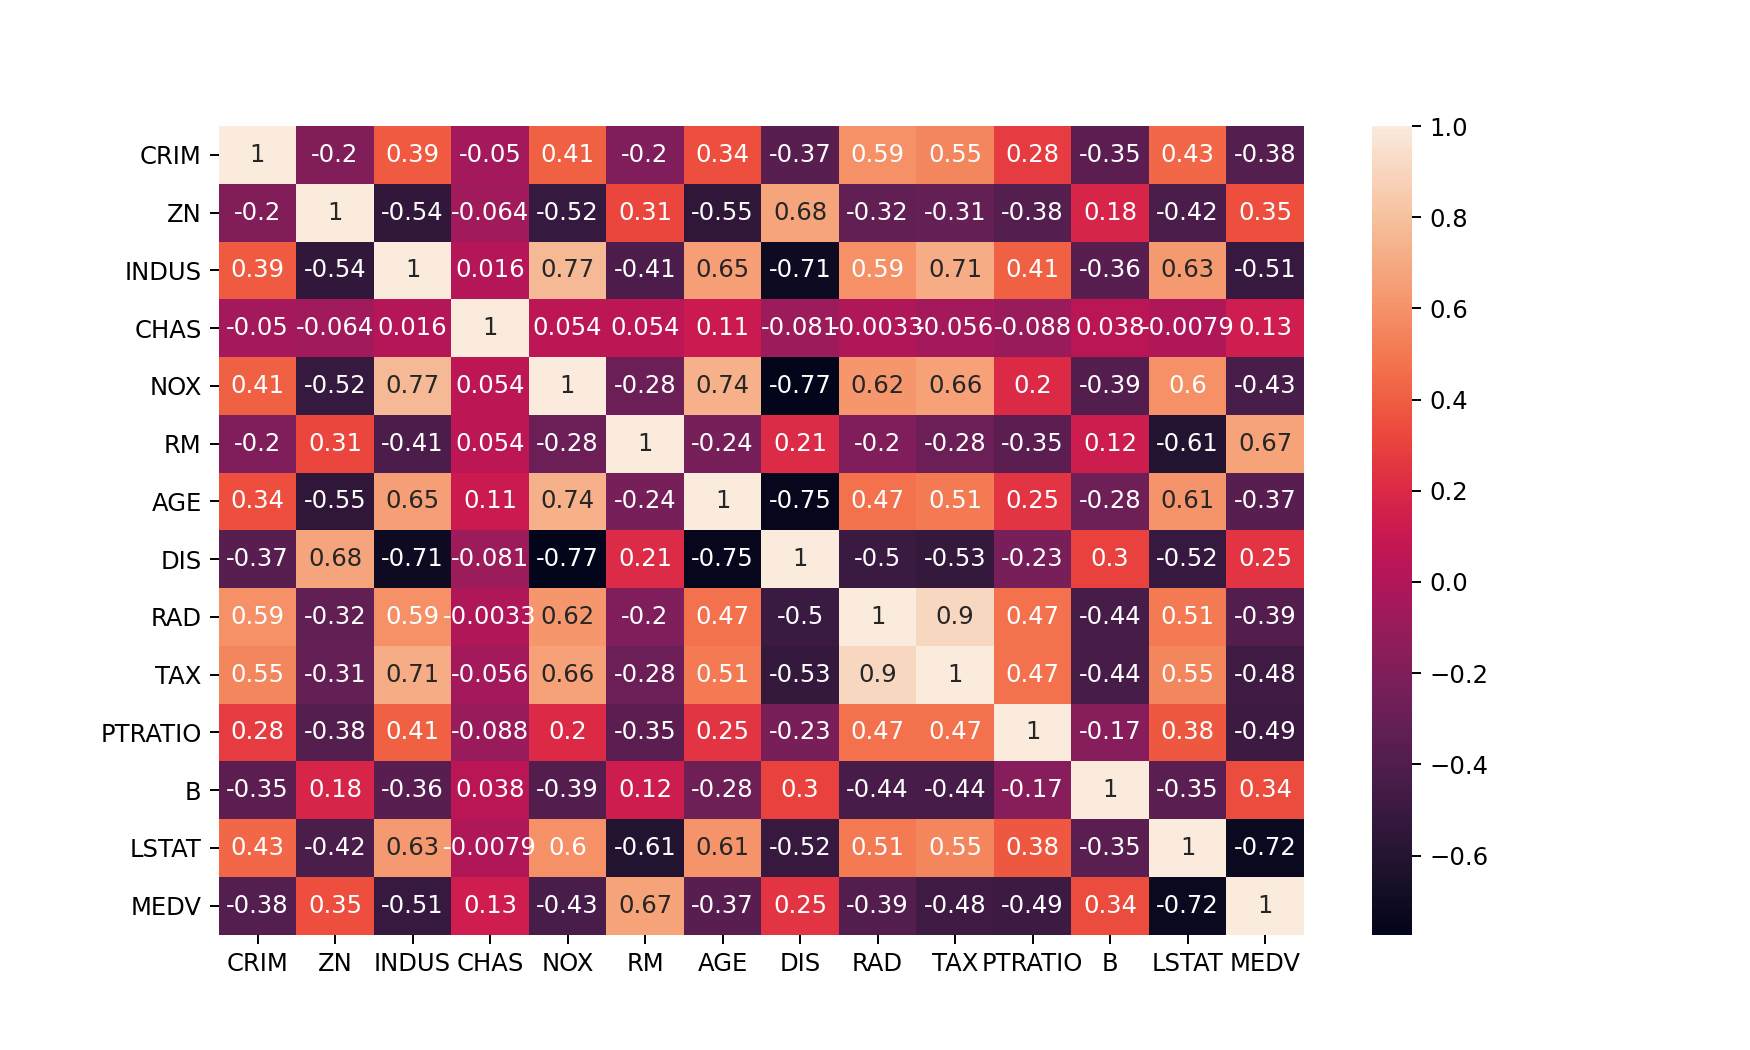

<AxesSubplot: >

In [13]:
correlation = pd.concat([train_x, train_y], axis=1)
f, ax = plt.subplots(figsize=(10,6))
sns.heatmap(correlation.corr(), annot=True)

## Entrenar datos con modelo de regresión linear sin estandarizar datos


CRIM - MSE: 70.749; R2: 0.084; MAE: 6.029
ZN - MSE: 69.542; R2: 0.100; MAE: 5.972
INDUS - MSE: 60.381; R2: 0.218; MAE: 5.821
CHAS - MSE: 74.627; R2: 0.034; MAE: 6.326
NOX - MSE: 65.802; R2: 0.148; MAE: 5.836
RM - MSE: 42.538; R2: 0.449; MAE: 4.269
AGE - MSE: 71.076; R2: 0.080; MAE: 5.865
DIS - MSE: 76.862; R2: 0.005; MAE: 6.306
RAD - MSE: 64.704; R2: 0.162; MAE: 6.080
TAX - MSE: 57.950; R2: 0.250; MAE: 5.741
PTRATIO - MSE: 54.077; R2: 0.300; MAE: 5.715
B - MSE: 68.261; R2: 0.116; MAE: 5.959
LSTAT - MSE: 35.817; R2: 0.536; MAE: 4.359


<IPython.core.display.Javascript object>


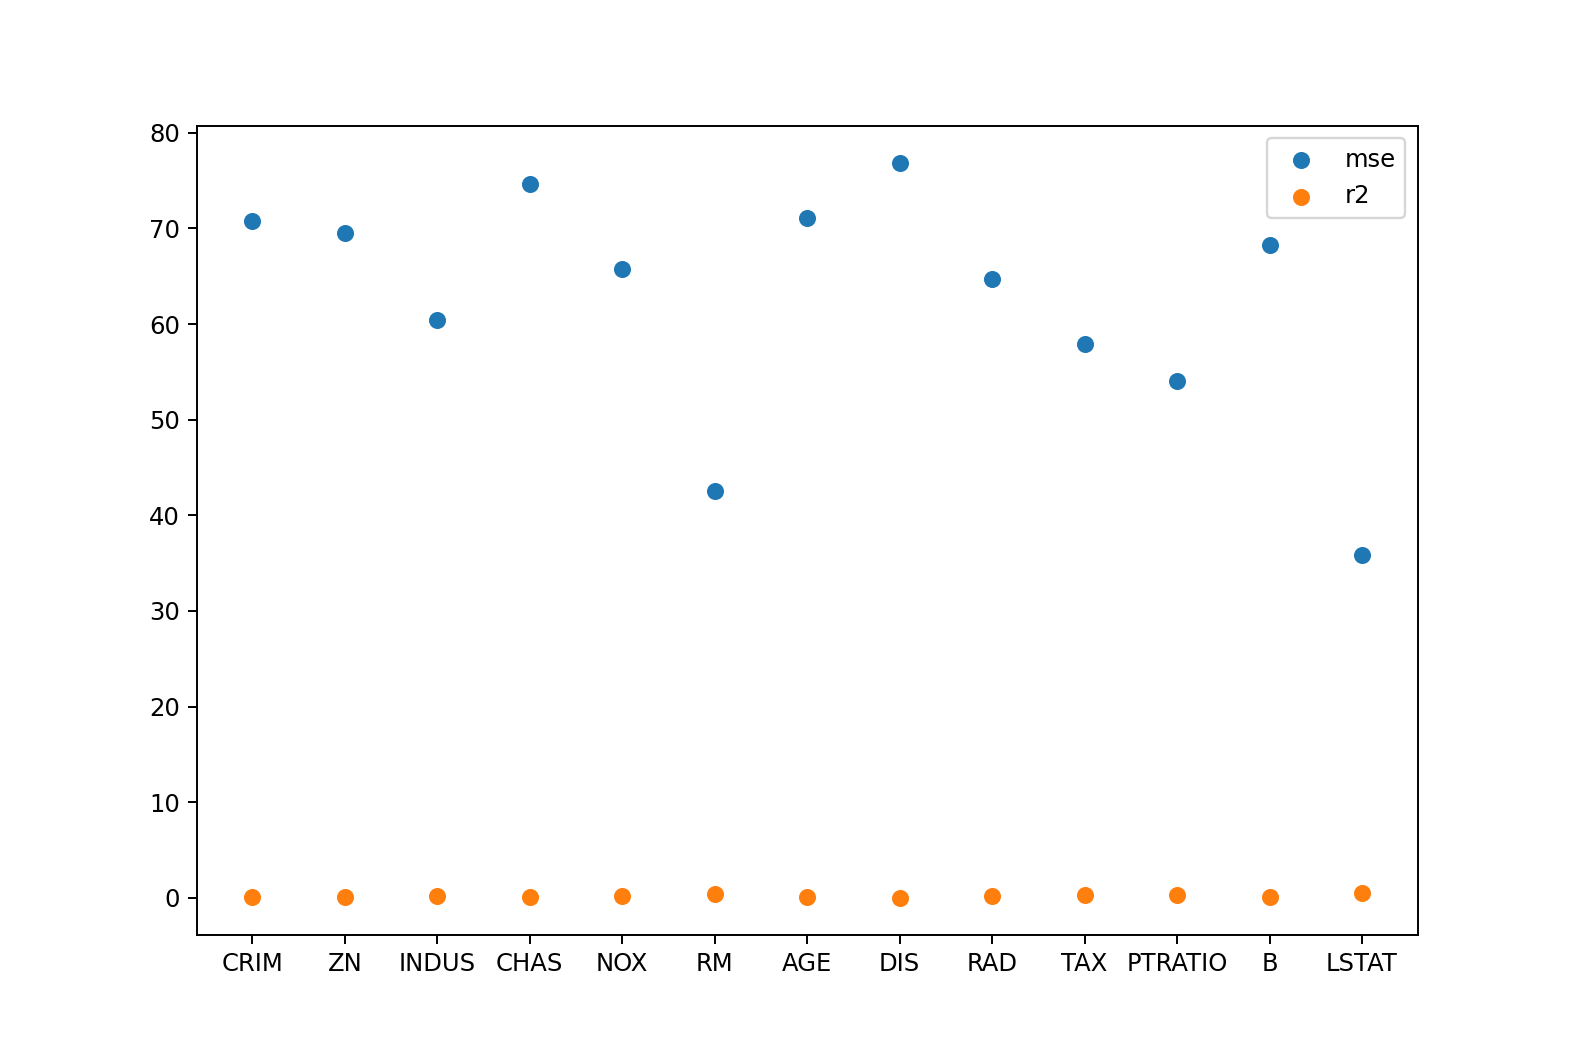

In [131]:
import numpy as np #importem la llibreria
np.warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#verison no estandarizados
  
features = train_x.columns
train_y_aux = train_y.values
test_y_aux = test_y.values
test_x_aux = test_x.values
train_x_aux = train_x.values

mses, r2s = [], []
features = features.tolist()

linear_model = LinearRegression()
for idx, feature in enumerate(features):
    linear_model.fit(train_x_aux[:, idx, None], train_y_aux)
    preds = linear_model.predict(test_x_aux[:, idx, None])
    mse = mean_squared_error(test_y_aux, preds)
    mae = mean_absolute_error(test_y_aux, preds)
    mses.append(mse)
    
    r2 = r2_score(test_y_aux, preds)
    r2s.append(r2)

    print(f"{feature} - MSE: {mse:.3f}; R2: {r2:.3f}; MAE: {mae:.3f}")

mses = np.array(mses)
r2s = np.array(r2s)
plt.figure(figsize=(9,6)) 
plt.scatter(features, mses, label='mse')
plt.scatter(features, r2s, label='r2')
plt.legend()
plt.show()


In [125]:
# normalizar

def standarize(x, mean=None, std=None):
    if mean is None:
        mean = x.mean(0)
    if std is None:
        std = x.std(0)
    
    return (x - mean[None, :]) / std[None, :], mean, std

train_x_norm, mean, std = standarize(train_x.values)
test_x_norm, _, _ = standarize(test_x.values, mean, std)

train_y_norm, mean, std = standarize(train_y.values[:, None])
test_y_norm, _, _ = standarize(test_y.values[:, None], mean, std)

<IPython.core.display.Javascript object>


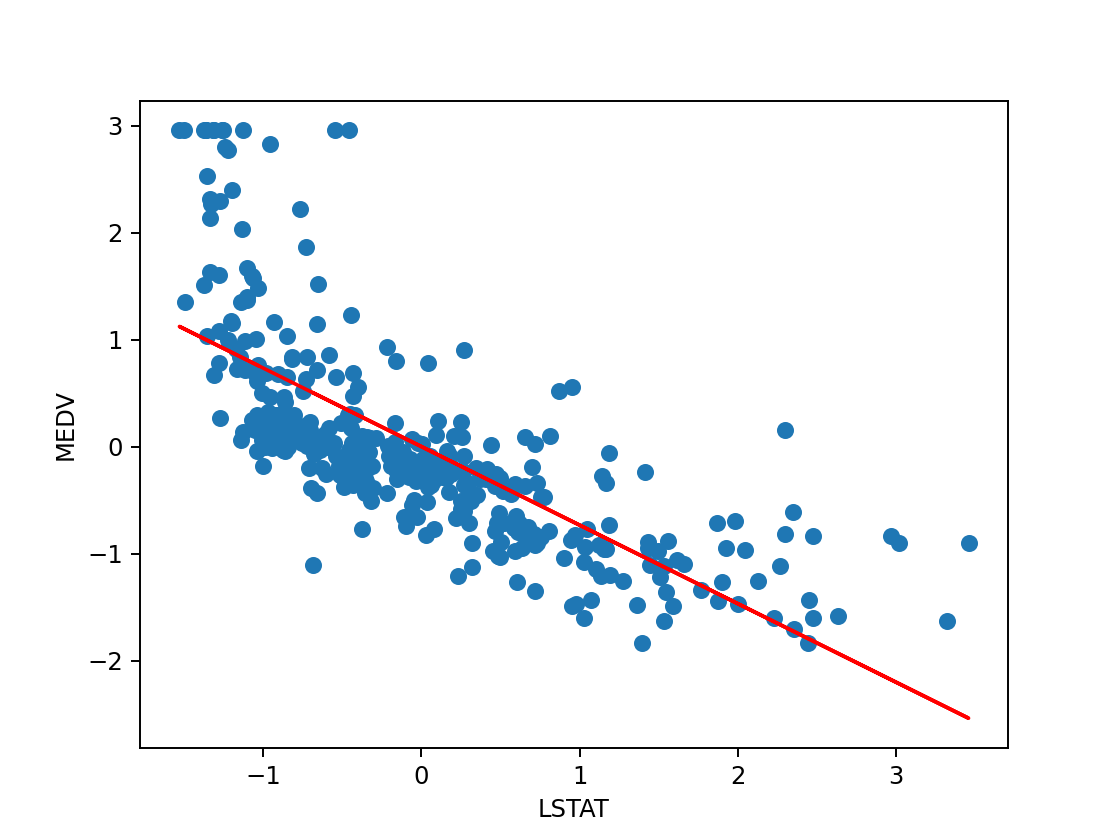

MSE:  3.006641385508653
R2:  -2.006641385508654


In [120]:
from sklearn.metrics import r2_score

# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
atribut1 = train_x_norm[:,12].reshape(train_x_norm.shape[0], 1) 
regr = regression(atribut1, train_y_norm) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(train_x_norm[:,12], train_y_norm)
plt.plot(atribut1[:,0], predicted, 'r')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

# Mostrem l'error (MSE i R2)
MSE = mean_squared_error(atribut1, predicted)
r2 = r2_score(atribut1, predicted)

print("MSE: ", MSE)
print("R2: ", r2)

## ahora con datos estandarizados

CRIM - MSE: 0.747; R2: 0.141; MAE: 0.640
ZN - MSE: 0.745; R2: 0.143; MAE: 0.614
INDUS - MSE: 0.570; R2: 0.344; MAE: 0.572
CHAS - MSE: 0.898; R2: -0.034; MAE: 0.705
NOX - MSE: 0.689; R2: 0.207; MAE: 0.612
RM - MSE: 0.443; R2: 0.490; MAE: 0.458
AGE - MSE: 0.698; R2: 0.196; MAE: 0.605
DIS - MSE: 0.804; R2: 0.075; MAE: 0.652
RAD - MSE: 0.711; R2: 0.181; MAE: 0.616
TAX - MSE: 0.612; R2: 0.295; MAE: 0.584
PTRATIO - MSE: 0.650; R2: 0.251; MAE: 0.613
B - MSE: 0.762; R2: 0.123; MAE: 0.632
LSTAT - MSE: 0.383; R2: 0.559; MAE: 0.444


<IPython.core.display.Javascript object>


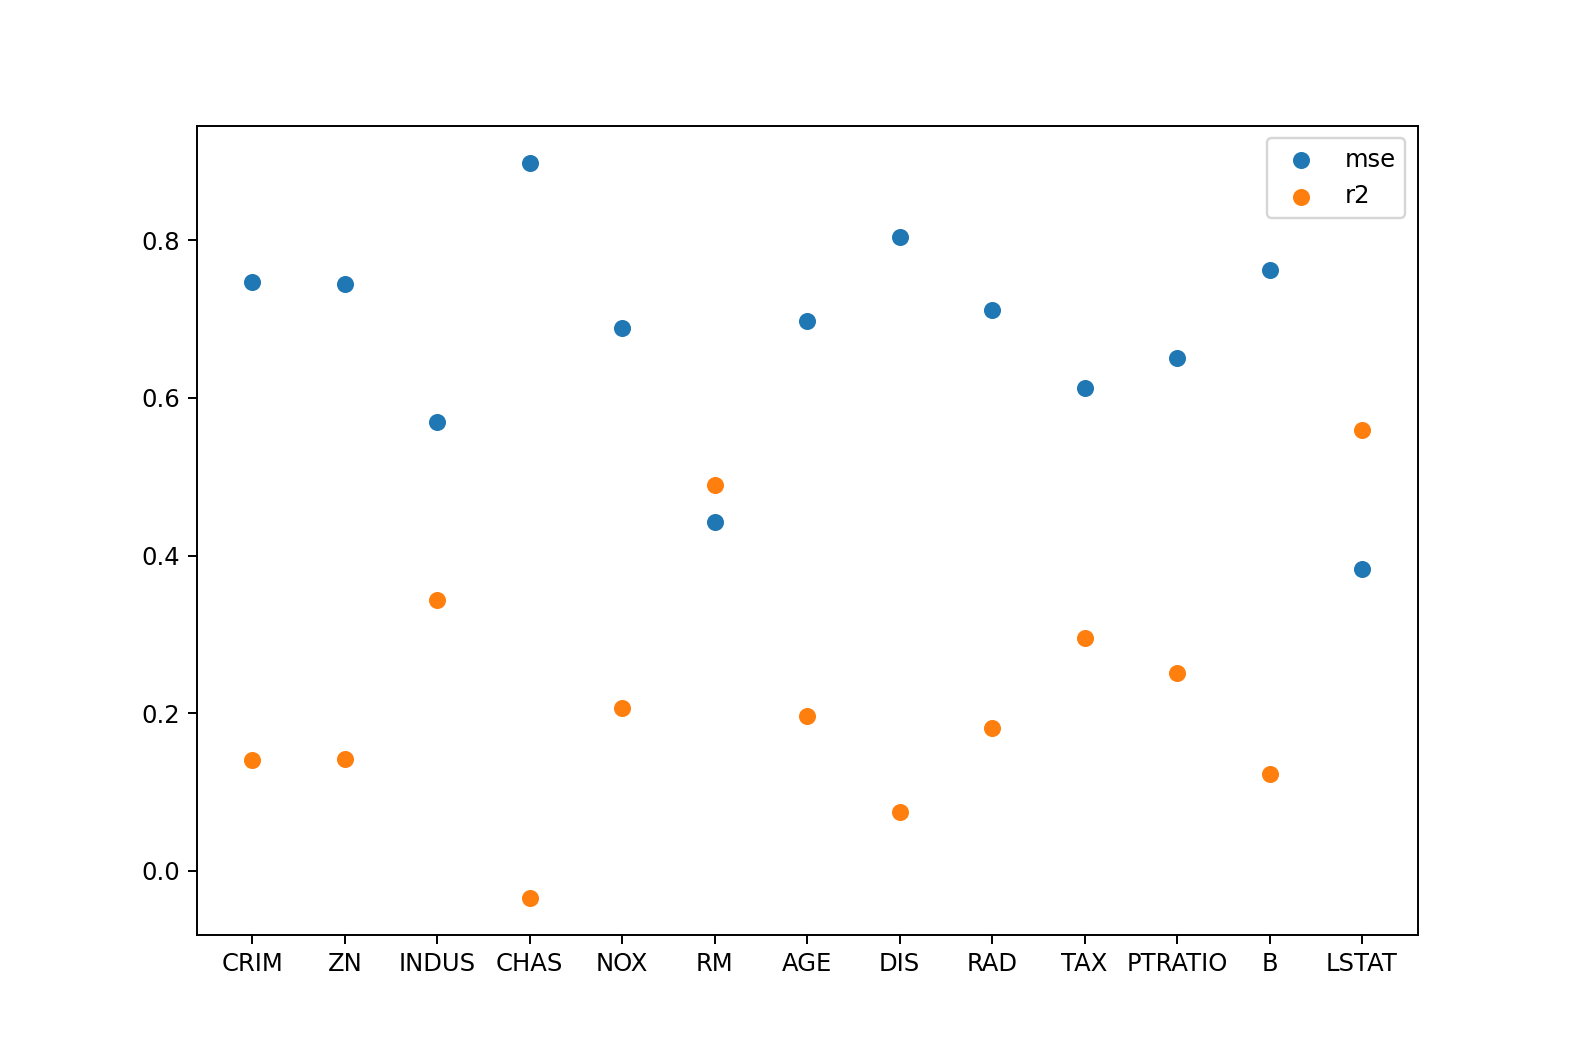

In [132]:
model = LinearRegression()

features = train_x.columns
mses, r2s = [], []
features = features.tolist()
for idx, feature in enumerate(features):
    
    model.fit(train_x_norm[:, idx, None], train_y_norm)
    preds = model.predict(test_x_norm[:, idx, None])
          
    #preds = model_entrenat.predict(test_x_norm[:, idx, None])
    mse = mean_squared_error(test_y_norm, preds)
    mae = mean_absolute_error(test_y_norm, preds)
    mses.append(mse)
    
    r2 = r2_score(test_y_norm, preds)
    r2s.append(r2)

    print(f"{feature} - MSE: {mse:.3f}; R2: {r2:.3f}; MAE: {mae:.3f}")

mses = np.array(mses)
r2s = np.array(r2s)
plt.figure(figsize=(9,6)) 
plt.scatter(features, mses, label='mse')
plt.scatter(features, r2s, label='r2')
plt.legend()
plt.show()

## ver si el modelo de RM y LSTAT predice bien 

<IPython.core.display.Javascript object>


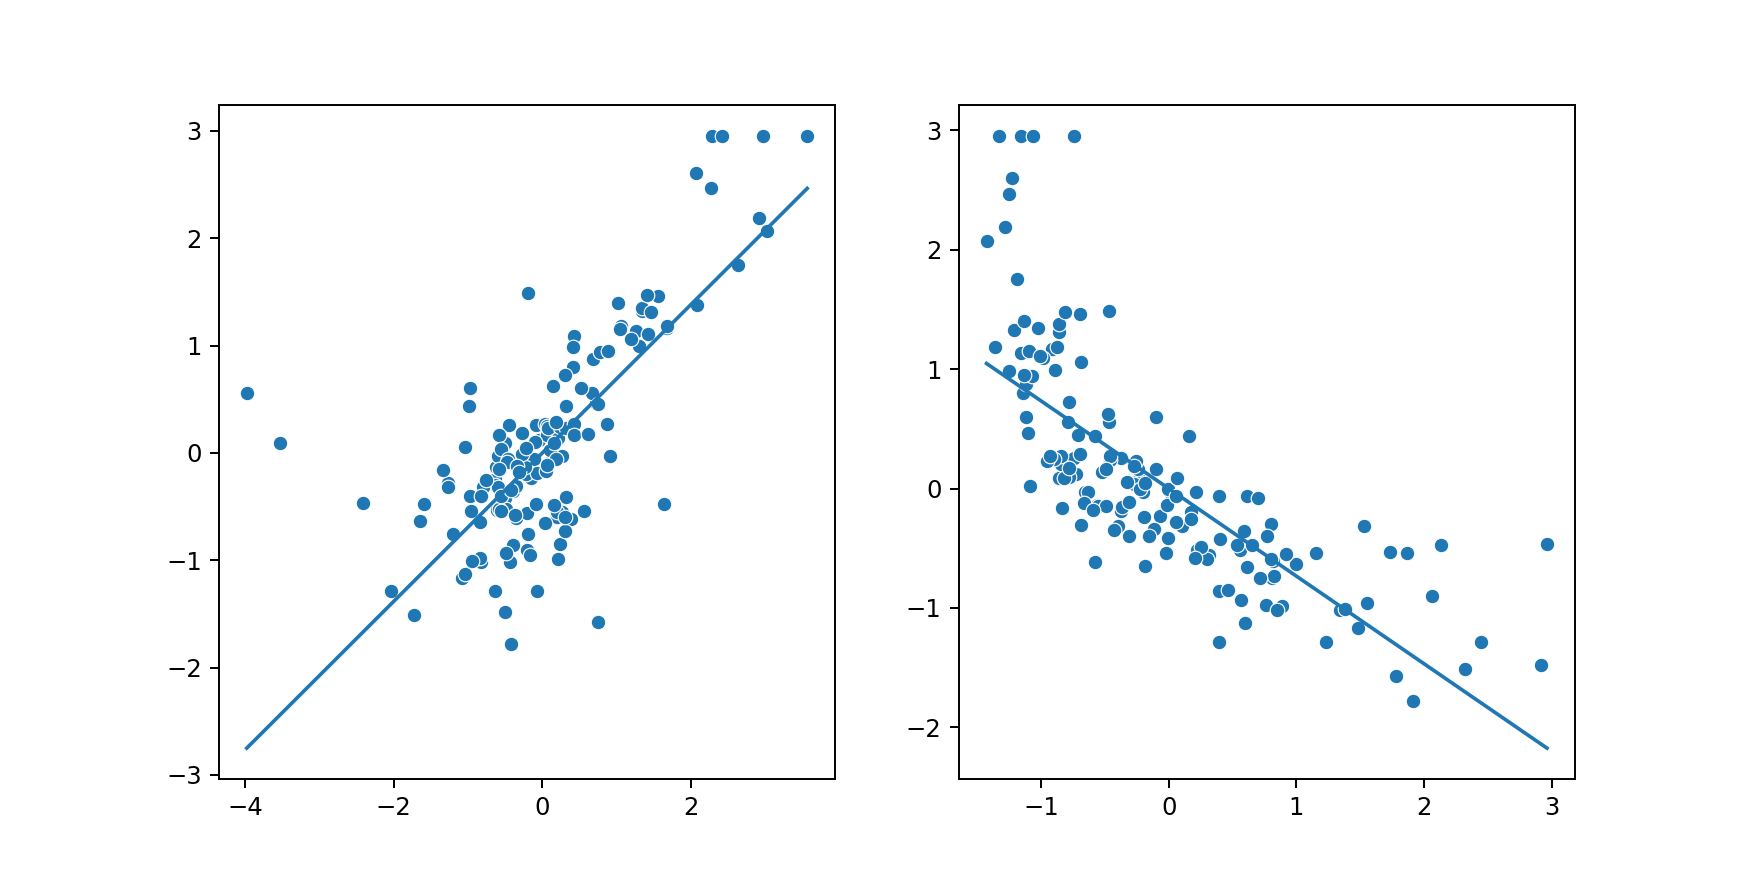

<AxesSubplot: >

In [133]:
f, ax = plt.subplots(1, 2, figsize=(10,5))
modelRM = regression(train_x_norm[:, 5, None], train_y_norm)
#modelRM = linear_model.fit(train_x_norm[:, 5, None], train_y_norm)
preds_RM = modelRM.predict(test_x_norm[:, 5, None])

modelLSTAT = regression(train_x_norm[:, 12, None], train_y_norm)
modelLSTAT = linear_model.fit(train_x_norm[:, 12, None], train_y_norm)
preds_LSTAT = modelLSTAT.predict(test_x_norm[:, 12, None])


sns.lineplot(y=preds_RM[:,0], x=test_x_norm[:, 5], ax=ax[0])
sns.scatterplot(y=test_y_norm[:,0], x=test_x_norm[:, 5], ax=ax[0])


sns.lineplot(y=preds_LSTAT[:,0], x=test_x_norm[:, 12], ax=ax[1])
sns.scatterplot(y=test_y_norm[:,0], x=test_x_norm[:, 12], ax=ax[1])

<IPython.core.display.Javascript object>


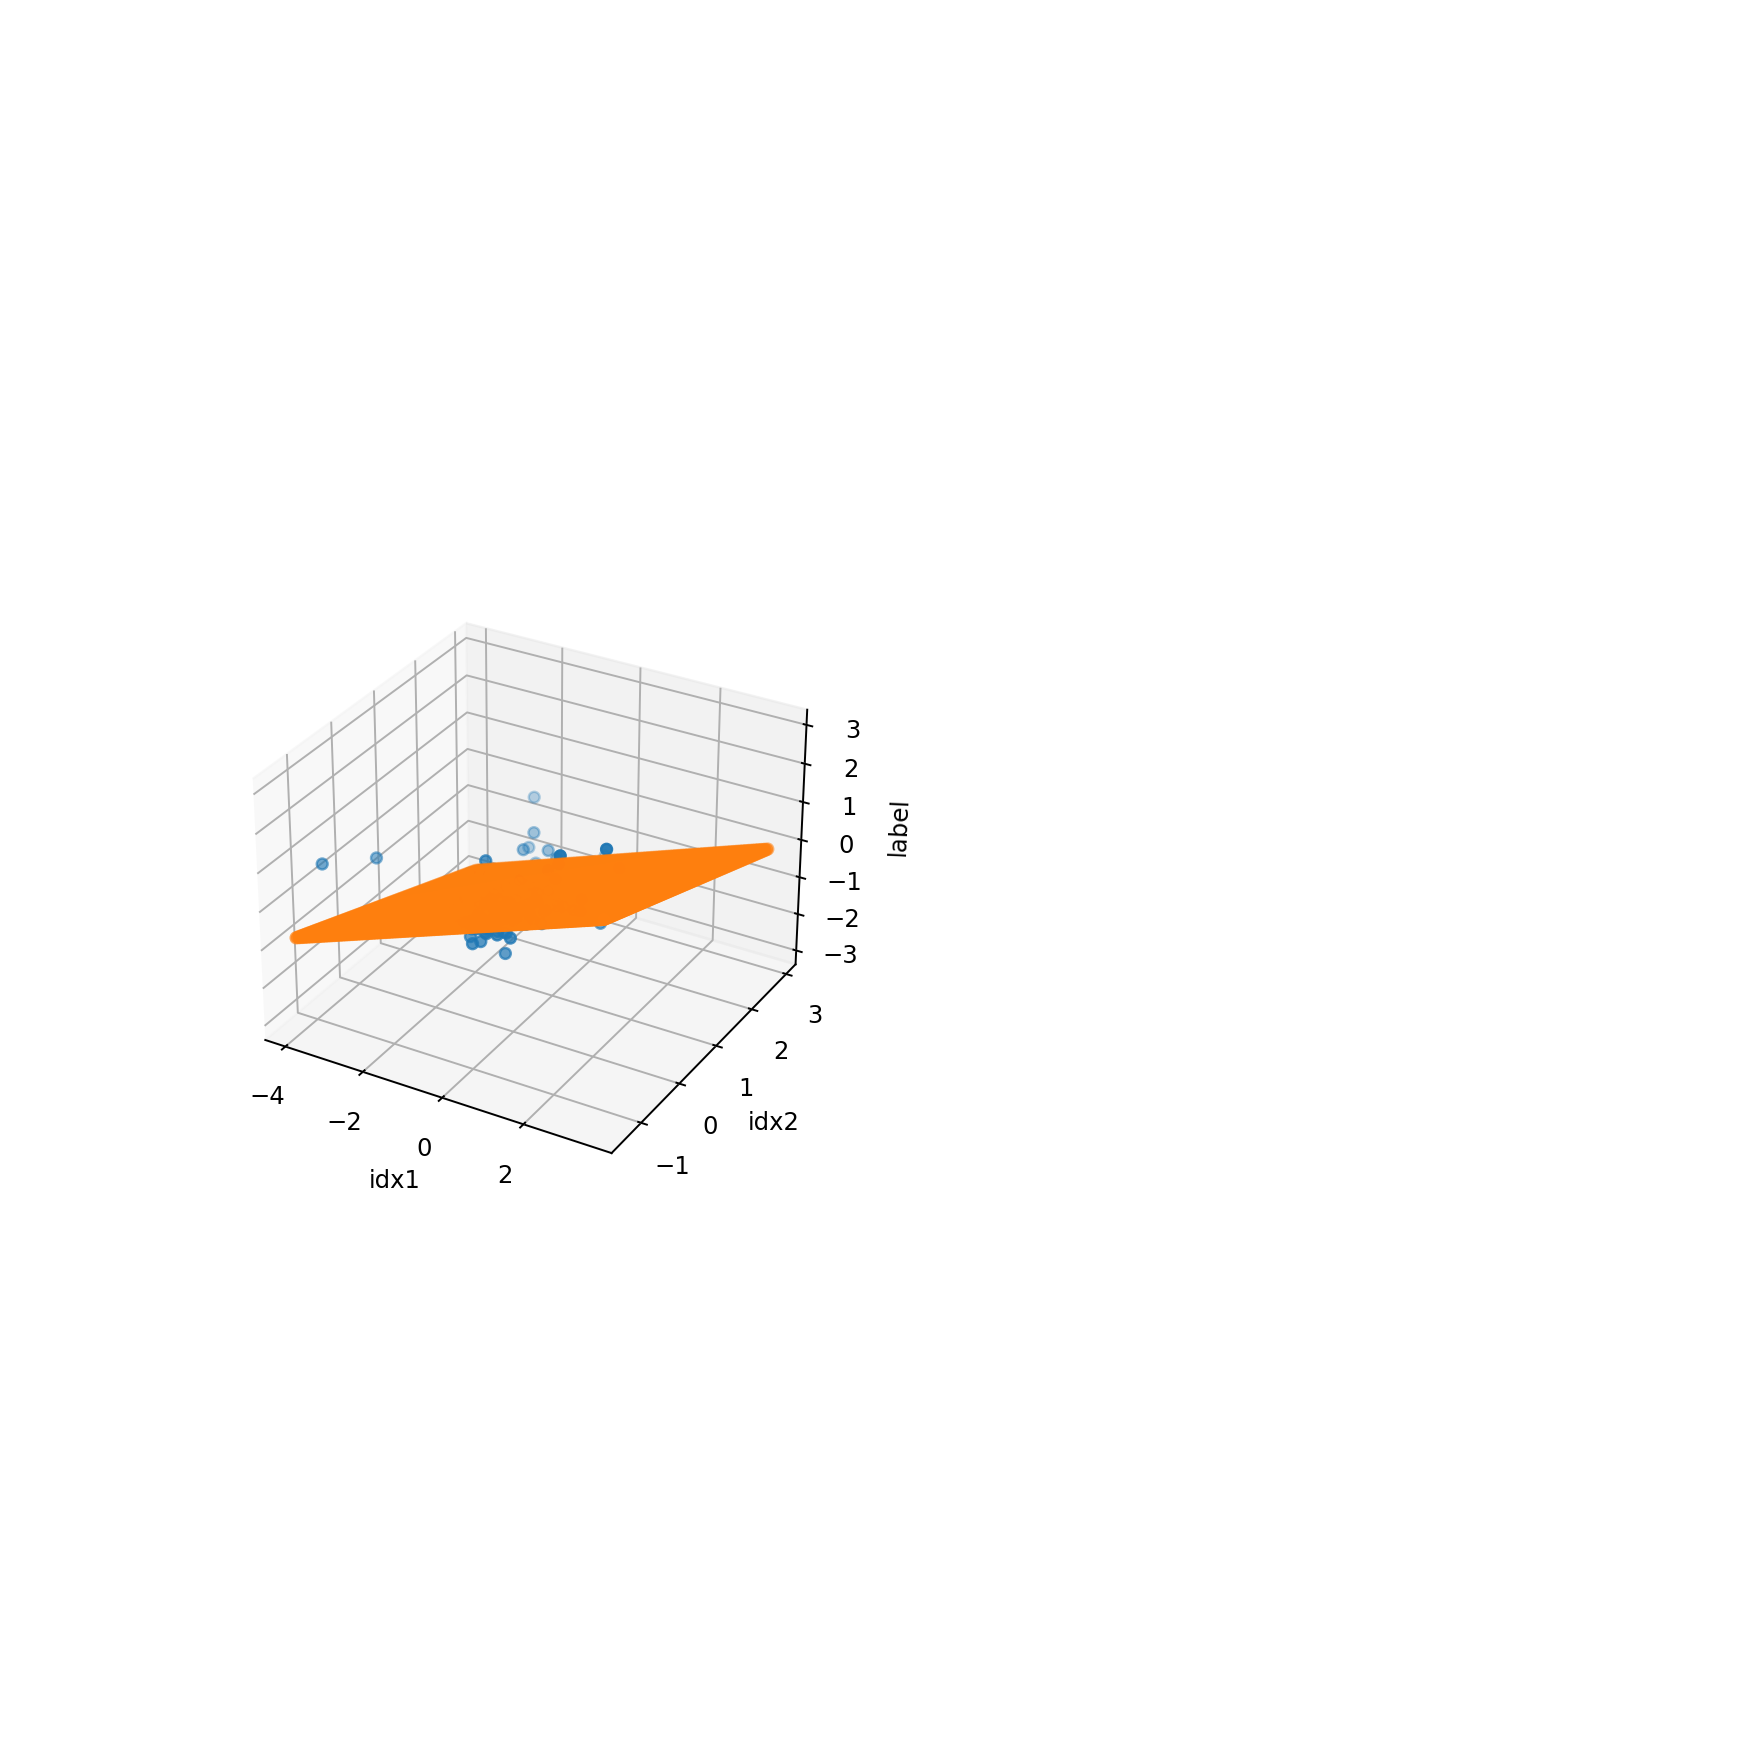

0.685198942997872 by taking into account RM and LSTAT


In [135]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(1, 2, 1, projection='3d')

idxs = [5,12]
model = linear_model.fit(train_x_norm[:, idxs], train_y_norm)
#model = regression(train_x_norm[:, idxs, None], train_y_norm)   
score = model.score(test_x_norm[:, idxs], test_y_norm)

# plot de los puntos en los 3 ejes: los 2 atributos y el valor real a predecir (y)
ax.scatter(test_x_norm[:, idxs[0]], test_x_norm[:, idxs[1]], test_y_norm[:,0])

# creamos una malla de samples sobre las que queremos predecir el valor
x_pred, y_pred = np.meshgrid(
    np.linspace(test_x_norm[:, idxs[0]].min(), test_x_norm[:, idxs[0]].max(), 100),
    np.linspace(test_x_norm[:, idxs[1]].min(), test_x_norm[:, idxs[1]].max(), 100),
)
to_pred = np.array([x_pred.flatten(), y_pred.flatten()]).T

preds = model.predict(to_pred)

# ploteamos todos los puntos que conforman la malla para generar el plano de puntos
ax.scatter(x_pred.flatten(), y_pred.flatten(), preds)

ax.set_xlabel('idx1')
ax.set_ylabel('idx2')
ax.set_zlabel('label')

print(score, "by taking into account RM and LSTAT")

## Evaluar el modelo con un conjunto de validación no visto


In [177]:
""" Per a assegurar-nos que el model s'ajusta be a dades noves, no vistes, 
cal evaluar-lo en un conjunt de validacio (i un altre de test en situacions reals).
Com que en aquest cas no en tenim, el generarem separant les dades en 
un 80% d'entrenament i un 20% de validació.
"""
from sklearn.model_selection import train_test_split
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val


X = dataset.drop(['CRIM', 'ZN','INDUS','CHAS','NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'MEDV'], axis = 1)
y = dataset["MEDV"]


x_train, y_train, x_val, y_val = split_data(X.values, y.values)

train_x_norm, mean, std = standarize(x_train)
test_x_norm, _, _ = standarize(x_val, mean, std)

train_y_norm, mean, std = standarize(y_train[:, None])
test_y_norm, _, _ = standarize(y_val[:, None], mean, std)

model = LinearRegression()

for i in range(train_x_norm.shape[1]):
    x_t = train_x_norm[:,i] # seleccionem atribut i en conjunt de train
    x_v = test_x_norm[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))
    
    model.fit(x_t, train_y_norm)
    error = mean_squared_error(test_y_norm, model.predict(x_v)) # calculem error
    r2 = r2_score(test_y_norm, regr.predict(x_v))

    print("Error en atribut %d: %f" %(i, error))
    print("R2 score en atribut %d: %f" %(i, r2))


Error en atribut 0: 0.655404
R2 score en atribut 0: -1.363865
Error en atribut 1: 0.375597
R2 score en atribut 1: 0.651872


## PCA


PCA_1 - MSE: 0.523; R2: 0.388
PCA_2 - MSE: 0.465; R2: 0.455
PCA_3 - MSE: 0.341; R2: 0.601
PCA_4 - MSE: 0.327; R2: 0.618
PCA_5 - MSE: 0.262; R2: 0.694
PCA_6 - MSE: 0.269; R2: 0.685
PCA_7 - MSE: 0.275; R2: 0.678
PCA_8 - MSE: 0.278; R2: 0.675


<IPython.core.display.Javascript object>


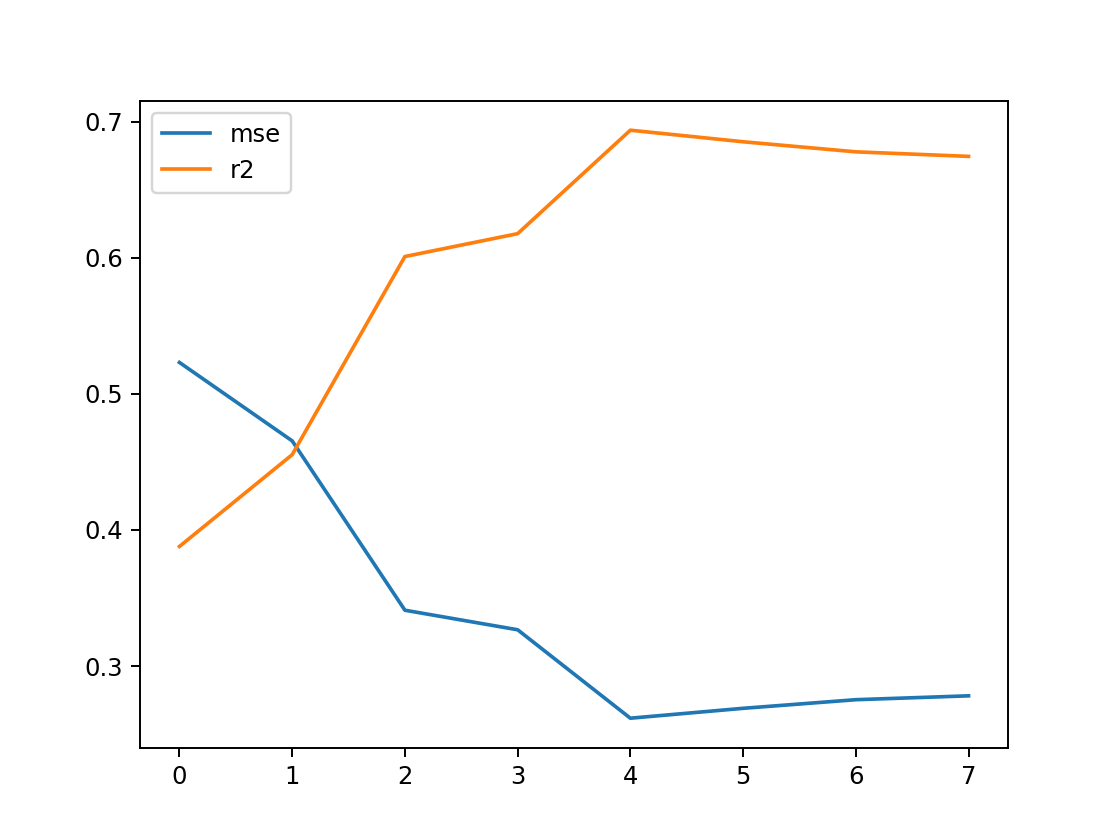

In [115]:
mses, r2s = [], []

for i in range(1, 9):
    pca = PCA(n_components=i)
    x_train = pca.fit_transform(train_x_norm)
    x_test = pca.transform(test_x_norm)

    linear_model = LinearRegression()
    linear_model.fit(x_train, train_y_norm)
    preds = linear_model.predict(x_test)

    mse = mean_squared_error(test_y_norm, preds)
    r2 = r2_score(test_y_norm, preds)
    print(f"PCA_{i} - MSE: {mse:.3f}; R2: {r2:.3f}")
    
    mses.append(mse)
    r2s.append(r2)
plt.figure() 
plt.plot(mses, label='mse')
plt.plot(r2s, label='r2')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


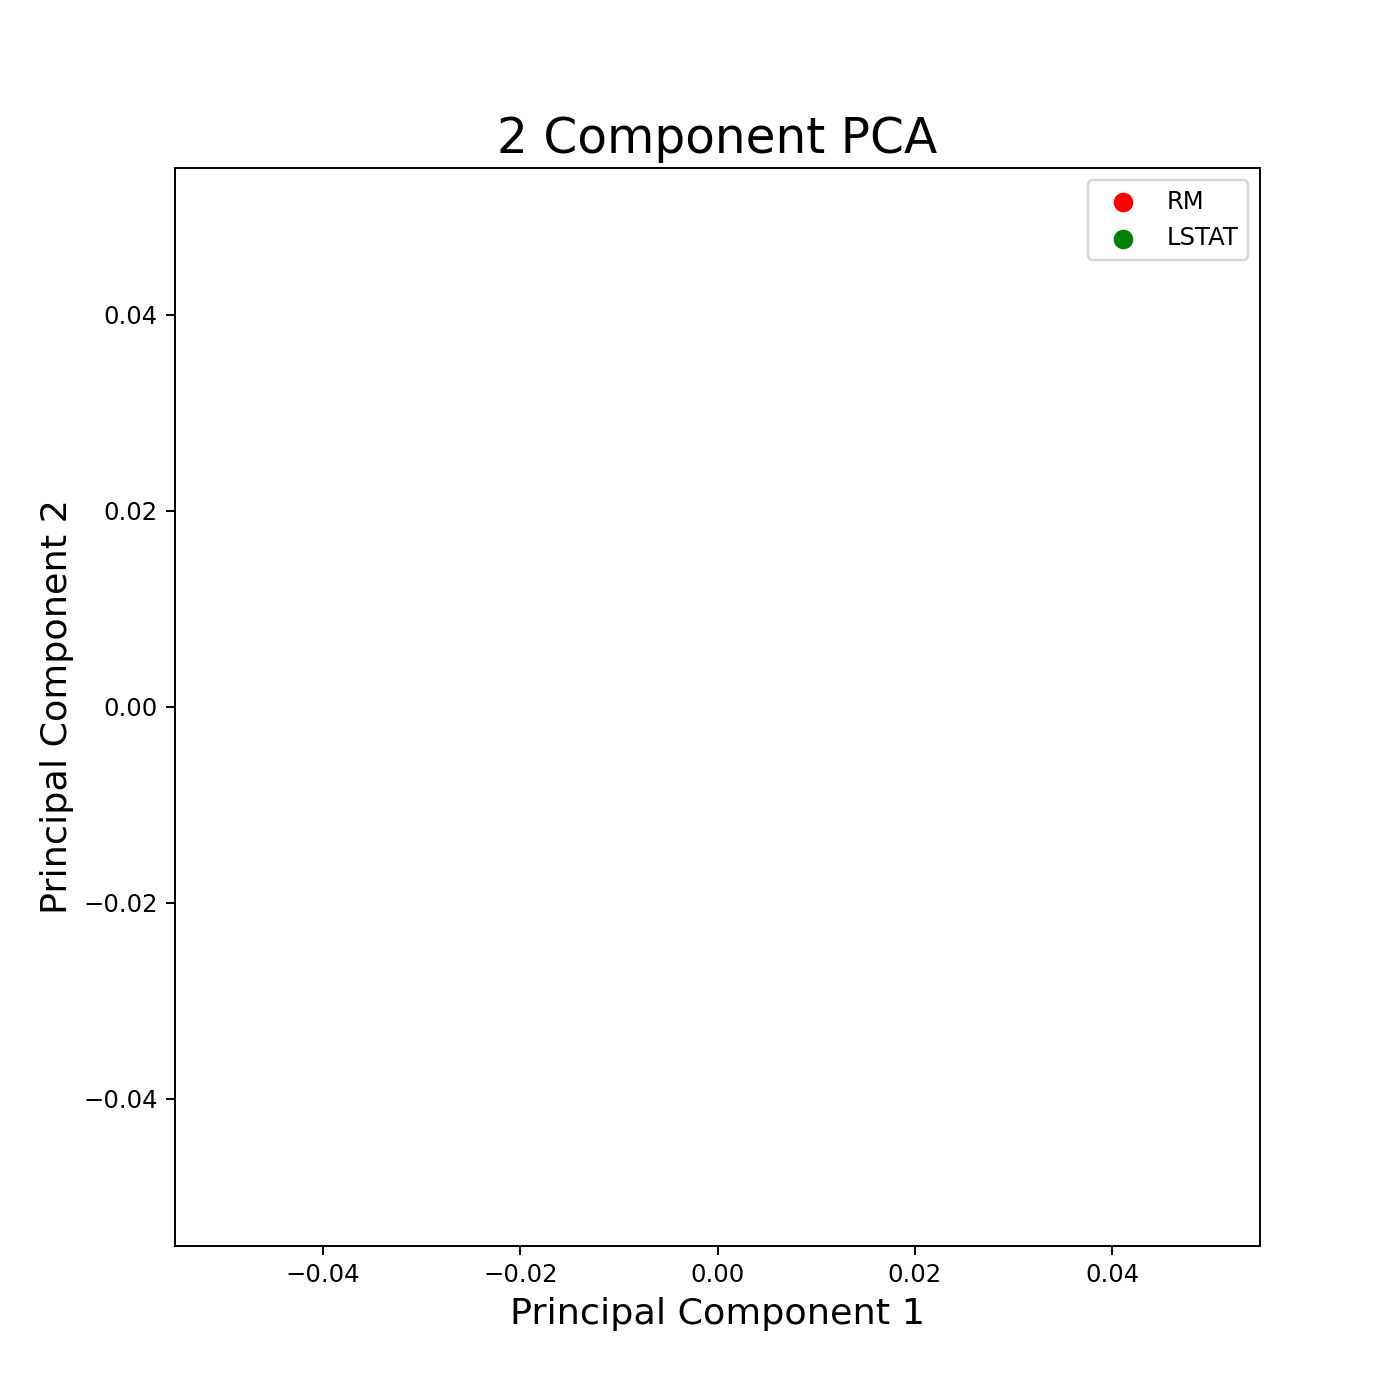

In [118]:

pca = PCA(n_components=2)
x_train = pca.fit_transform(train_x_norm)
principalDf = pd.DataFrame(data = x_train, columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)
dataset['MEDV'].head()
finalDf = pd.concat([principalDf, dataset['MEDV']], axis = 1)
finalDf.head(5)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['RM', 'LSTAT']
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['MEDV'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
    ax.legend(targets)
    ax.grid()






# Apartat (A): El descens del gradient  

En aquest exercici, es tracta d'implementar en python el procés de descent del gradient explicat a les classes de teoria, i comparar-lo amb els resultats obtinguts amb l'apartat (B). 

$$J(w) = \frac{1}{2m} \left[ \sum^m_{i=1}(f(x^{i}; w) - y^{i})^2 + \lambda\sum_{j=1}^{n}(w_{j}^2) \right]$$

Fixeu-vos que $J$ retorna el `mse`. Per a trobar $w_j$, repetir fins convergència:
$$w_0 = w_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot 1$$
$$w_j = w_j - \alpha \left[\frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i} - \frac{\lambda}{m}w_{j} \right]$$


ó:

$$w_{j} := w_{j} \left(1-\alpha \frac{\lambda}{m} \right) - \alpha\frac{\lambda}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i}$$

On si considerem un regressor lineal (el model és una recta), llavors $w_0$ i $w_1$ representen, respectivament, la $b$ i $a$ de la fòrmula de la recta: 

$$h_\theta(x^{(i)}) = ax + b$$

$\alpha$ és el learning rate, i $h_\theta(x^{(i)})$ és la funció que fa la regressió, és a dir, la funció que prediu el valor de $y^{(i)}$ donat un(s) atribut(s) concret(s) $x^{(i)}$.

Així, tenint calculat el model en l'últim punt del primer exercici, ja sabeu quin resultat hauríeu d'obtenir. O no, perquè la vostra implementació pot ser millor! En concret, es tracta de desenvolupar aquestes tasques:

* Definir la funció de cost i del gradient

* Estudiar com l'ús de regularitzadors afecta el resultat: overfitting, underfitting, etc. 

* Visualització de les dades a analitzar i explicació pas a pas del procediment   

* Visualització del procés de descens de gradient 

* Modificar el learning rate i el nombre d'iteracions 

<img src="images/gradient_descent.png">

Per a la implementació us podeu basar en el següent esquelet:

In [16]:
class Regressor(object):
    def __init__(self, w0, w1, alpha):
        # Inicialitzem w0 i w1 (per ser ampliat amb altres w's)
        self.w0 = w0
        self.w1 = w1
        self.alpha = alpha

        
    def predict(self, x):
        # implementar aqui la funció de prediccio
        pass
    
    def __update(self, hy, y):
        # actualitzar aqui els pesos donada la prediccio (hy) i la y real.
        pass
    
    def train(self, max_iter, epsilon):
        # Entrenar durant max_iter iteracions o fins que la millora sigui inferior a epsilon
        pass

L'últim pas serà validar el regressor trobat pel descent del gradient desenvolupat en aquest apartat visualment, aplicat a un model de recta i un model de pla. Per a això, caldrà considerar el millor atribut identificat en el primer punt de l'anterior entrega per visualitzar la línia regressora en 2D (podeu mostrar dades 2d amb la funció scatter). Després, dos dels atributs identificats a l'últim punt del primer exercici per visualitzar el pla regressor en 3D (En el cas 3D l’scatter s’ha de fer sobre una figura amb projecció 3D).

<IPython.core.display.Javascript object>


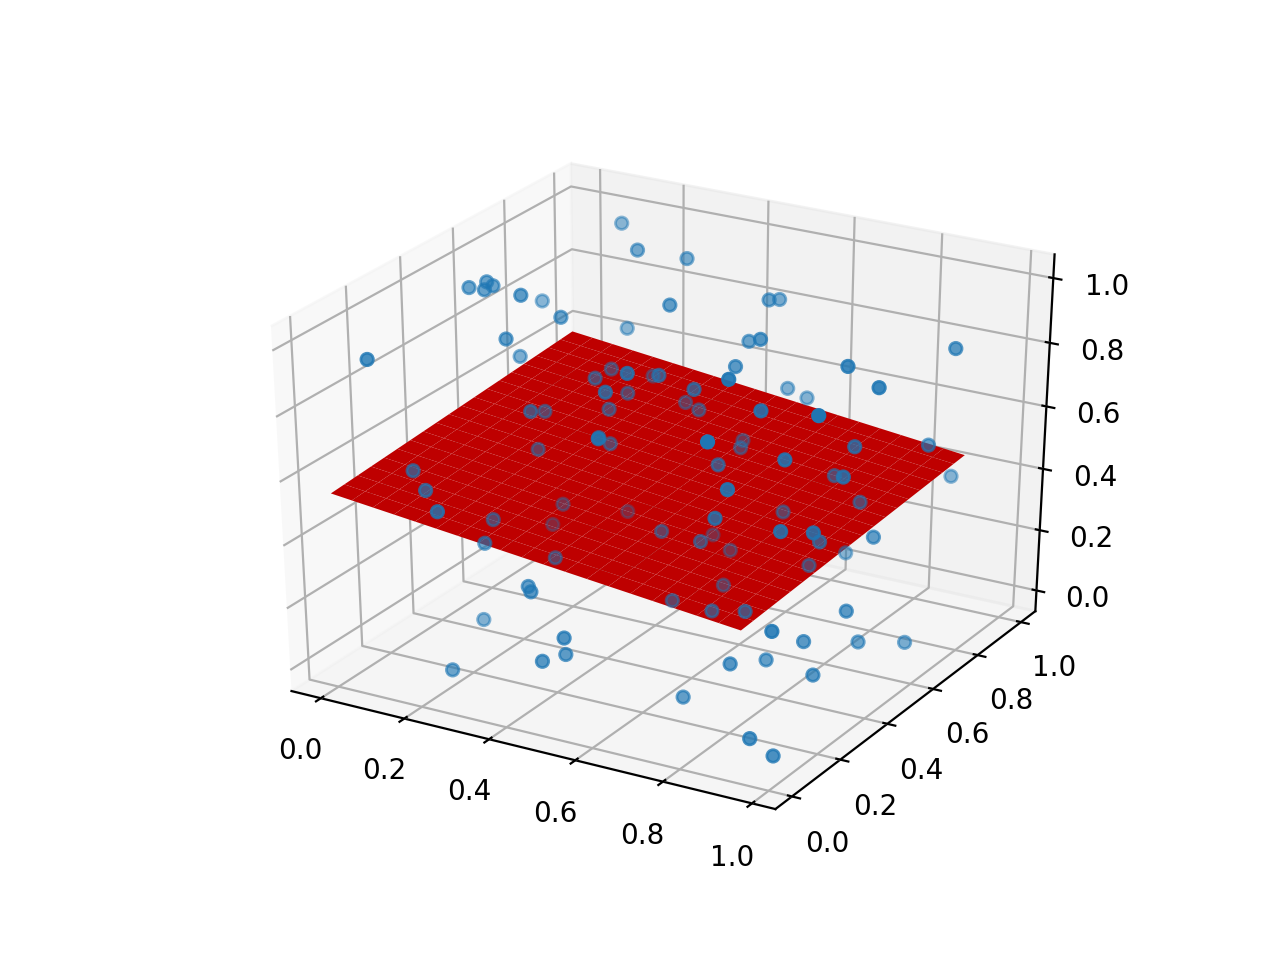

In [17]:
%matplotlib notebook

# Creem figura 3d
from mpl_toolkits.mplot3d import axes3d, Axes3D
# generem dades 3D d'exemple
x_val = np.random.random((100, 2))
y_val = np.random.random((100, 1))
regr = regression(x_val, y_val)
predX3D = regr.predict(x_val)

# Afegim els 1's
A = np.hstack((x_val,np.ones([x_val.shape[0],1])))
w = np.linalg.lstsq(A,predX3D)[0]

#Dibuixem
#1r creem una malla acoplada a la zona de punts per tal de representar el pla
malla = (range(20) + 0 * np.ones(20)) / 10 
malla_x1 =  malla * (max(x_val[:,0]) - min(x_val[:,0]))/2 + min(x_val[:,0])
malla_x2 =  malla * (max(x_val[:,1]) - min(x_val[:,1]))/2 + min(x_val[:,1])

#la funcio meshgrid ens aparella un de malla_x1 amb un de malla_x2, per atot
#element de mallax_1 i per a tot element de malla_x2.
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)

# Cal desnormalitzar les dades
def desnormalitzar(x, mean, std):
    return x * std + mean

#ara creem la superficies que es un pla
zplot = w[0] * xplot + w[1] * yplot + w[2]

#Dibuixem punts i superficie
plt3d = plt.figure('Coeficiente prismatico -- Relacio longitud desplacament 3D', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(x_val[:,0],x_val[:,1],y_val)

Així es podrà contestar a aquestes preguntes:

1. Com influeixen tots els paràmetres en el procés de descens? Quins valors de learning rate convergeixen més ràpid a la solució òptima? Com influeix la inicialització del model en el resultat final? 

2. Quines funcions polinomials (de diferent grau, de diferents combinacions d'atributs, ...) heu escollit per ser apreses amb el vostre descens del gradient? quina ha donat el millor resultat (en error i rapidesa en convergència)?

3. Utilitzeu el regularitzador en la fòrmula de funció de cost i descens del gradient i proveu polinomis de diferent grau. Com afecta el valor del regularitzador?

3. Quina diferència (quantitativa i qualitativa) hi ha entre el vostre regressor i el de la llibreria ?

4. Té sentit el model (polinomial) trobat quan es visualitza sobre les dades? 

5. Ajuda la visualització a identificar aquelles mostres per a les que el regressor obté els pitjors resultats de predicció? 
